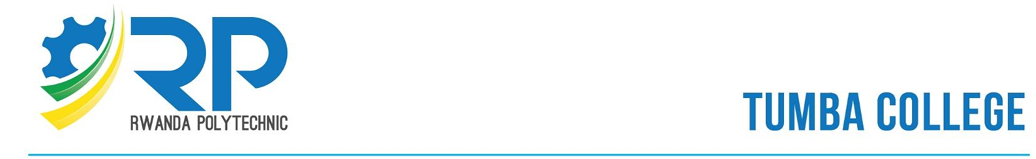

# Price prediction

In [1]:
import pandas as pd
import joblib

In [2]:
df=pd.read_csv('Clean_Data.csv')

In [3]:
df


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price
0,0,Qatar Airways,SG-8709,Kigali,Evening,zero,Night,Nairobi,Economy,2.17,1,5953
1,1,Qatar Airways,SG-8157,Kigali,Early_Morning,zero,Morning,Nairobi,Economy,2.33,1,5953
2,2,KLM,I5-764,Kigali,Early_Morning,zero,Early_Morning,Nairobi,Economy,2.17,1,5956
3,3,Ethiopian Airline,UK-995,Kigali,Morning,zero,Afternoon,Nairobi,Economy,2.25,1,5955
4,4,Ethiopian Airline,UK-963,Kigali,Morning,zero,Morning,Nairobi,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Ethiopian Airline,UK-822,Cairo,Morning,one,Evening,Kinshasa,Business,10.08,49,69265
300149,300149,Ethiopian Airline,UK-826,Cairo,Afternoon,one,Night,Kinshasa,Business,10.42,49,77105
300150,300150,Ethiopian Airline,UK-832,Cairo,Early_Morning,one,Night,Kinshasa,Business,13.83,49,79099
300151,300151,Ethiopian Airline,UK-828,Cairo,Early_Morning,one,Evening,Kinshasa,Business,10.00,49,81585


In [4]:
df=df.drop(columns='Unnamed: 0')

In [5]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price
0,Qatar Airways,SG-8709,Kigali,Evening,zero,Night,Nairobi,Economy,2.17,1,5953
1,Qatar Airways,SG-8157,Kigali,Early_Morning,zero,Morning,Nairobi,Economy,2.33,1,5953
2,KLM,I5-764,Kigali,Early_Morning,zero,Early_Morning,Nairobi,Economy,2.17,1,5956
3,Ethiopian Airline,UK-995,Kigali,Morning,zero,Afternoon,Nairobi,Economy,2.25,1,5955
4,Ethiopian Airline,UK-963,Kigali,Morning,zero,Morning,Nairobi,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Ethiopian Airline,UK-822,Cairo,Morning,one,Evening,Kinshasa,Business,10.08,49,69265
300149,Ethiopian Airline,UK-826,Cairo,Afternoon,one,Night,Kinshasa,Business,10.42,49,77105
300150,Ethiopian Airline,UK-832,Cairo,Early_Morning,one,Night,Kinshasa,Business,13.83,49,79099
300151,Ethiopian Airline,UK-828,Cairo,Early_Morning,one,Evening,Kinshasa,Business,10.00,49,81585


In [6]:
df.airline.value_counts()

airline
Ethiopian Airline    127859
Rwanda -Air           80892
Kenya Airways         43120
Egyptair              23173
KLM                   16098
Qatar Airways          9011
Name: count, dtype: int64

In [7]:
df.source_city.value_counts()

source_city
Kigali          61343
Nairobi         60896
Capetown        52061
Addis-abbaba    46347
Kinshasa        40806
Cairo           38700
Name: count, dtype: int64

In [8]:
df.destination_city.value_counts()

destination_city
Nairobi         59097
Kigali          57360
Capetown        51068
Addis-abbaba    49534
Kinshasa        42726
Cairo           40368
Name: count, dtype: int64

In [9]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [10]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [11]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [12]:
df['class'].value_counts()

KeyError: 'class'

In [13]:
df['duration'].min()

0.83

In [14]:
df['duration'].max()

49.83

In [15]:
df['duration'].median()

11.25

## Preprocessing

In [16]:
df=df.drop(columns='flight')

In [17]:
df


,airline,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price
0,Qatar Airways,Kigali,Evening,zero,Night,Nairobi,Economy,2.17,1,5953
1,Qatar Airways,Kigali,Early_Morning,zero,Morning,Nairobi,Economy,2.33,1,5953
2,KLM,Kigali,Early_Morning,zero,Early_Morning,Nairobi,Economy,2.17,1,5956
3,Ethiopian Airline,Kigali,Morning,zero,Afternoon,Nairobi,Economy,2.25,1,5955
4,Ethiopian Airline,Kigali,Morning,zero,Morning,Nairobi,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Ethiopian Airline,Cairo,Morning,one,Evening,Kinshasa,Business,10.08,49,69265
300149,Ethiopian Airline,Cairo,Afternoon,one,Night,Kinshasa,Business,10.42,49,77105
300150,Ethiopian Airline,Cairo,Early_Morning,one,Night,Kinshasa,Business,13.83,49,79099
300151,Ethiopian Airline,Cairo,Early_Morning,one,Evening,Kinshasa,Business,10.00,49,81585


In [ ]:
df['class']=df['class'].apply(lambda x:1 if x=='Business'else 0)

In [ ]:
df

In [ ]:
df.stops=pd.factorize(df.stops)[0]

In [ ]:
df

In [ ]:
df = df.join(pd.get_dummies(df.airline, prefix='airline', dtype=int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source', dtype=int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest', dtype=int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival', dtype=int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure', dtype=int)).drop('departure_time', axis=1)


In [ ]:
df

## Training model

In [ ]:
df.columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x,y=df.drop('price', axis=1), df.price

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [ ]:
My_model = RandomForestRegressor(
    n_estimators=50,        # fewer trees
    max_depth=10,           # limit tree depth
    min_samples_leaf=5      # reduce overfitting
)

In [ ]:
My_model.fit(x_train, y_train)

In [ ]:

#My_model = RandomForestRegressor()
#My_model.fit(x_train, y_train)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#My_model.score(x_test, y_test)
print ('Acuracy:', My_model.score(x_test, y_test))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred=My_model.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
print(y_pred)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
x.columns

In [ ]:
input_data = [[
    1,      # stops
    1,      # class (encoded)
    6.2,    # duration
    15,     # days_left
    0, 1, 0, 0, 0, 0,       # airline one-hot (indexes 4–9)
    0, 0, 0, 1, 0, 0,       # source one-hot (indexes 10–15)
    0, 0, 0, 0, 0, 1,       # dest one-hot (indexes 16–21)
    0, 0, 0, 0, 1, 0,       # arrival one-hot (indexes 22–27)
    0, 1, 0, 0, 0, 0        # departure one-hot (indexes 28–33)
]]
predicted_price = My_model.predict(input_data)
print(f"Predicted price: {predicted_price[0]:.2f} RWF")

## detecting out liers and handle them

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Price')

In [ ]:
 df.price.describe()

In [ ]:
importances = dict(zip(My_model.feature_names_in_, My_model.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

In [ ]:
df.days_left.describe()


In [ ]:
plt.figure(figsize=(20, 6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [ ]:
df.isnull().sum()

In [ ]:
# df=df.dropna()     this is used to remove the null/missing value
#df

## Making Prediction 

In [ ]:
# Save the model using pickle
#import pickle
#with open('my_model.pkl', 'wb') as file:
  #  pickle.dump(My_model, file)


## Save the model for the future use

In [ ]:

joblib.dump(My_model, "Model.pkl", compress=3) 

In [ ]:
#import pickle
#File_name='Flight Price Prediction.sav'
#pickle.dump(My_model,open(File_name,'wb'))

## Laod the model

In [ ]:
#loaded_model = pickle.load(open('Flight Price Prediction.sav','rb'))

In [ ]:
loaded_model = joblib.load("Model.pkl")

In [ ]:
# Prediction using load model

In [ ]:
predicted_price = loaded_model.predict(input_data)
print(f"Predicted price: {predicted_price[0]:.2f} RWF")